# 範例重點
了解如何 reset Tensorflow Graph  
學習如何以迴圈方式訓練不同超參數的模型  
學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0907 20:10:59.701462 17604 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0907 20:10:59.702459 17604 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0907 20:10:59.790224 17604 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 20:10:59.790224 17604 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0907 20:11:00.017653 17604 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3484 - acc: 0.1557 - val_loss: 2.0514 - val_acc: 0.2178
Epoch 2/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.9735 - acc: 0.2544 - val_loss: 1.9863 - val_acc: 0.2507
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8969 - acc: 0.2911 - val_loss: 1.8690 - val_acc: 0.2954
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8942 - acc: 0.2892 - val_loss: 2.0782 - val_acc: 0.2607
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8677 - acc: 0.3070 - val_loss: 1.8442 - val_acc: 0.3157
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8291 - acc: 0.3251 - val_loss: 1.8377 - val_acc: 0.3195
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8000 - acc: 0.3428 - val_loss: 1.8029 - val

Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6022 - acc: 0.4298 - val_loss: 1.5837 - val_acc: 0.4342
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5101 - acc: 0.4645 - val_loss: 1.5185 - val_acc: 0.4492
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4509 - acc: 0.4846 - val_loss: 1.5147 - val_acc: 0.4726
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4063 - acc: 0.4986 - val_loss: 1.4852 - val_acc: 0.4710
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3682 - acc: 0.5144 - val_loss: 1.4416 - val_acc: 0.4910
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3259 - acc: 0.5285 - val_loss: 1.3996 - val_acc: 0.4982
Epoch 8/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2907 - acc: 0.5409 - val_loss: 1.4134 - val_acc: 0.5071
Epoch 9/50
50000/50000 [===========

50000/50000 [==============================] - 5s 106us/step - loss: 1.7045 - acc: 0.4006 - val_loss: 1.6753 - val_acc: 0.4103
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6463 - acc: 0.4229 - val_loss: 1.6305 - val_acc: 0.4256
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6006 - acc: 0.4386 - val_loss: 1.5873 - val_acc: 0.4406
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5615 - acc: 0.4541 - val_loss: 1.5703 - val_acc: 0.4458
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5295 - acc: 0.4644 - val_loss: 1.5401 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5001 - acc: 0.4728 - val_loss: 1.5174 - val_acc: 0.4595
Epoch 9/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4712 - acc: 0.4838 - val_loss: 1.4985 - val_acc: 0.4692
Epoch 10/50
50000/50000 [========================

50000/50000 [==============================] - 5s 108us/step - loss: 2.0013 - acc: 0.3018 - val_loss: 1.9763 - val_acc: 0.3222
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9593 - acc: 0.3180 - val_loss: 1.9391 - val_acc: 0.3314
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9262 - acc: 0.3298 - val_loss: 1.9098 - val_acc: 0.3394
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8986 - acc: 0.3399 - val_loss: 1.8852 - val_acc: 0.3447
Epoch 8/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.8754 - acc: 0.3490 - val_loss: 1.8643 - val_acc: 0.3523
Epoch 9/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.8552 - acc: 0.3547 - val_loss: 1.8461 - val_acc: 0.3598
Epoch 10/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8375 - acc: 0.3624 - val_loss: 1.8293 - val_acc: 0.3691
Epoch 11/50
50000/50000 [=========================

50000/50000 [==============================] - 5s 94us/step - loss: 2.2220 - acc: 0.2002 - val_loss: 2.2151 - val_acc: 0.2069
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2054 - acc: 0.2133 - val_loss: 2.1991 - val_acc: 0.2188
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1895 - acc: 0.2243 - val_loss: 2.1833 - val_acc: 0.2271
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1740 - acc: 0.2332 - val_loss: 2.1684 - val_acc: 0.2345
Epoch 9/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1594 - acc: 0.2397 - val_loss: 2.1543 - val_acc: 0.2411
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1456 - acc: 0.2478 - val_loss: 2.1410 - val_acc: 0.2502
Epoch 11/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1326 - acc: 0.2529 - val_loss: 2.1285 - val_acc: 0.2562
Epoch 12/50
50000/50000 [=========================

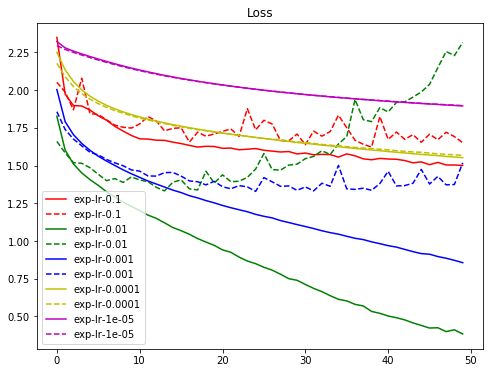

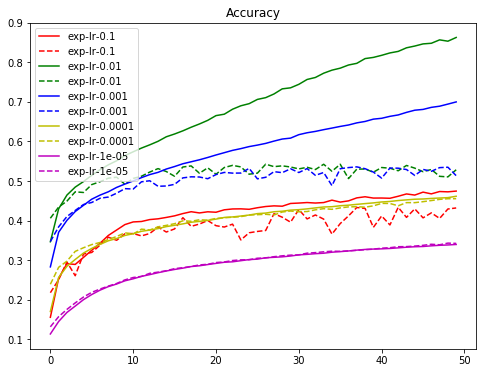

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Work
請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現